<a href="https://colab.research.google.com/github/Snehlata826/Snehlata826/blob/main/Geospatial_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

In [ ]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

In [ ]:
x_data

tensor([[1, 2],
        [3, 4]])

In [ ]:
# tensor from numpy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [ ]:
x_np

tensor([[1, 2],
        [3, 4]])

In [ ]:
!pip install torchgeo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.0/605.0 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 851.6/851.6 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 818.9/818.9 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.1/541.1 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.4 MB/s eta 0:00:00

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchgeo.datasets import EuroSAT100
import torch.nn.functional as F

In [ ]:
'''training_data =sets.FashionMNIST(
      root="data",
      train=True,
      download=True,
      transform=ToTensor(),
)'''

'training_data =sets.FashionMNIST(\n      root="data",\n      train=True,\n      download=True,\n      transform=ToTensor(),\n)'

In [ ]:
training_data=EuroSAT100(
      root="data",
      split="train",
      download=True
)

100%|██████████| 7.72M/7.72M [00:00<00:00, 35.8MB/s]
100%|██████████| 1.15k/1.15k [00:00<00:00, 2.33MB/s]
100%|██████████| 382/382 [00:00<00:00, 828kB/s]


In [ ]:
test_data=EuroSAT100(
      root="data",
      split="val",
      download=True,
)

In [ ]:
# maps tensor from image to its textual reprensentation
labels_map = {
      0:"Annual Crop",
      1:"Forest",
      2:"Herbaceous Buildings",
      3:"Highway",
      4:"Industrial Buildings",
      5:"Pasture",
      6:"Permanent Crop",
      7:"Residential Buildings",
      8:"River",
      9:"Sea & Lake"
}

In [ ]:
training_data[0]['image'].shape

torch.Size([13, 64, 64])

In [ ]:
len(training_data)

60

In [ ]:
import matplotlib.pyplot as plt


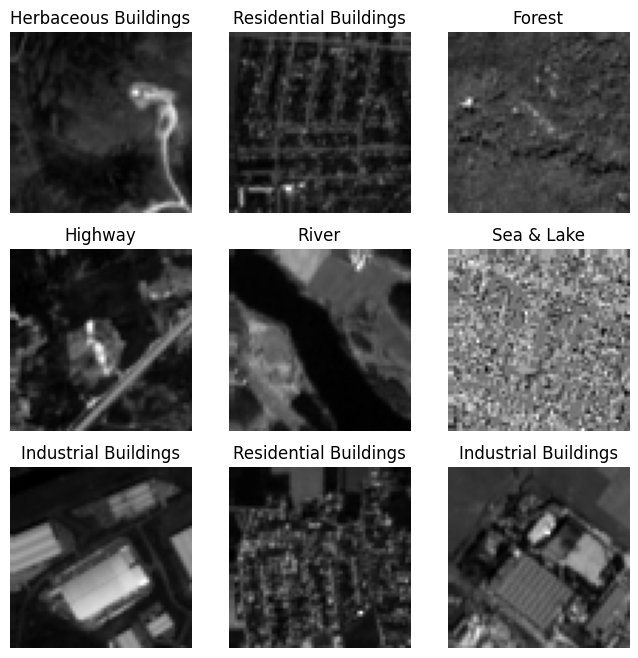

In [ ]:
figure = plt.figure(figsize=(8,8))
cols , rows = 3,3
for i in range(1,cols*rows+1):
  sample_idx = torch.randint(len(training_data),size=(1,)).item()
  data = training_data[sample_idx]
  img, label = data['image'],data['label'].item()
  figure.add_subplot(rows,cols,i)
  plt.title(labels_map[label])
  plt.axis('off')
  plt.imshow(img[3],cmap="gray")
plt.show()


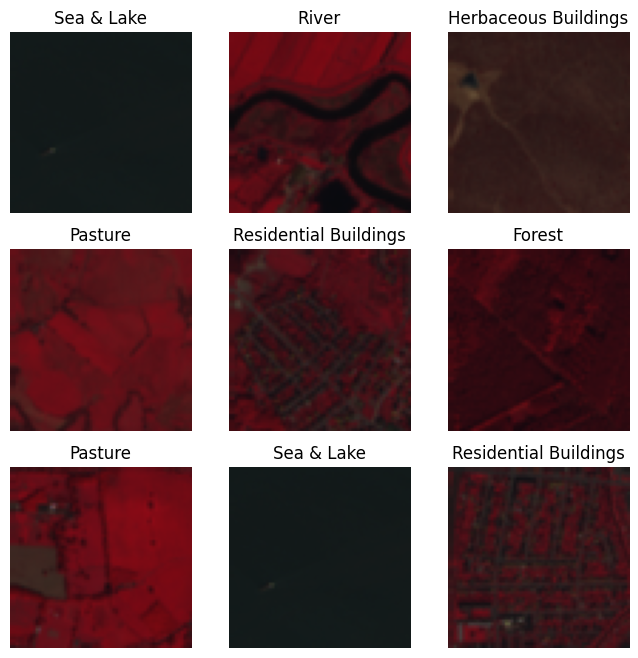

In [ ]:
# image in fcc(false composite)
figure = plt.figure(figsize=(8,8))
cols , rows = 3,3
for i in range(1,cols*rows+1):
  sample_idx = torch.randint(len(training_data),size=(1,)).item()
  data = training_data[sample_idx]
  img, label = data['image'],data['label'].item()
  img = torch.stack((img[7], img[3], img[2]), dim=0)
  img = torch.permute(img,(1,2,0))
  # img =T.TopILImage()(img)

  figure.add_subplot(rows,cols,i)
  plt.title(labels_map[label])
  plt.axis('off')
  # print(img)
  plt.imshow(img/10000.)
plt.show()


In [ ]:
batch_size =4

#create data loaders
train_dataloader = DataLoader(training_data,batch_size=batch_size,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=batch_size,shuffle=True)

for data in test_dataloader:
     X=data['image']
     y=data['label']
     print(f"shape of X[N,C,H,W]:{X.shape}")
     print(f"shape of y:{y.shape} {y.dtype}")
     break


shape of X[N,C,H,W]:torch.Size([4, 13, 64, 64])
shape of y:torch.Size([4]) torch.int64


In [ ]:
device =  (
    "cuda"
    if torch.cuda.is_available()
    else"mps"
    if torch.backends.mps.is_available()
    else"cpu"

)
print(f"Using {device} device")

Using cpu device


In [ ]:
class NeuralNetwork(nn.Module):
     def _init_(self):
          super()._init_()
          self.flatten = nn.Flatten()
          self.linear_relu_stack= nn.Sequential(
              nn.linear(13*64*64,512),
              nn.ReLU(),
              nn.Linear(512,128),
              nn.ReLU(),
              nn.linear(128,32),
              nn.ReLU(),
              nn.Linear(32,10)
              )

     def forward(self,x):
          x=self.flatten(x)
          logits=self.linear_relu_stack(x)
          return logits


In [ ]:
model =NeuralNetwork().to(device)

In [ ]:
print(model)

NeuralNetwork()
